# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [1]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

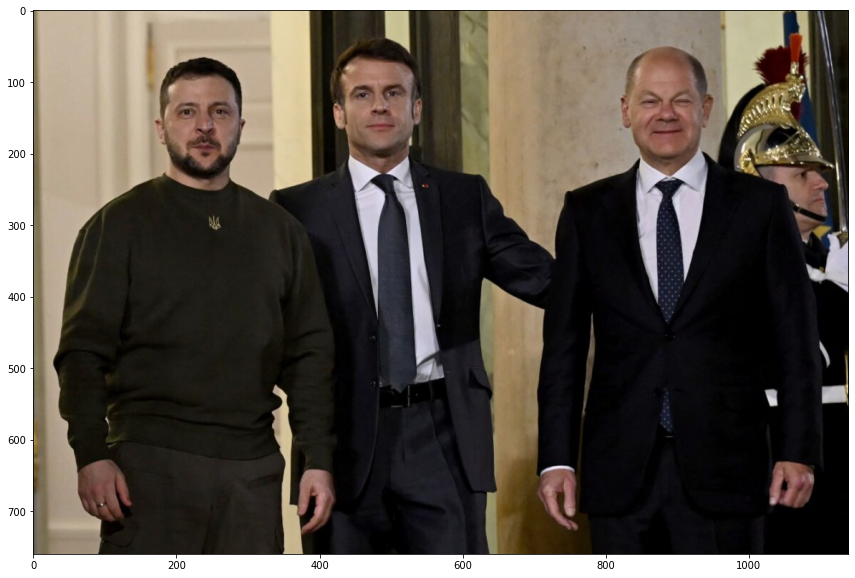

In [2]:
img = cv2.imread('./data/z3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

### Step 2

Load the dlib face predictor.

In [3]:
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [4]:
rects = detector(gray, 1)

### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

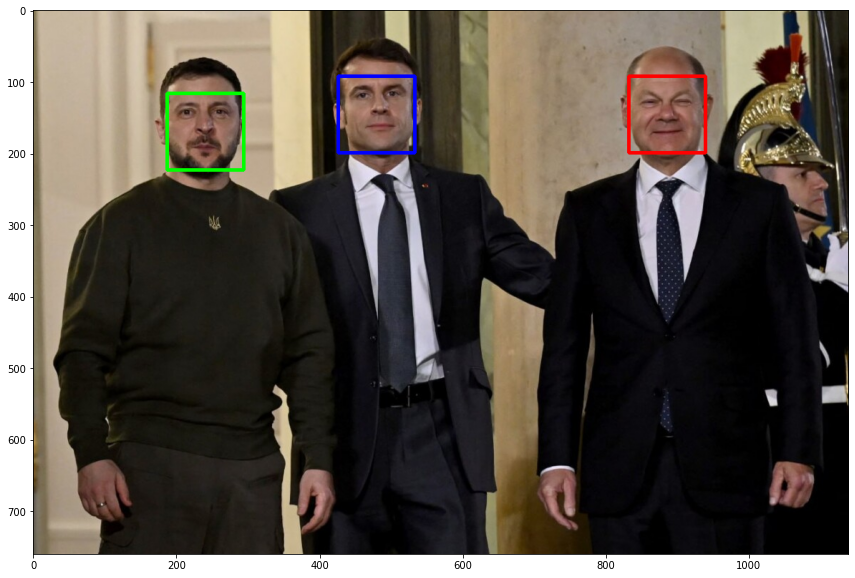

In [5]:
colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255), (0, 255, 255), (255, 0, 255), (255, 255, 0)]

def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)

def show_faces(img, upsample_num_times=1, width=3):
    # Find faces rectanngles
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    rects = detector(gray, upsample_num_times)

    # draw founded rectanges around faces
    result_dlib = np.copy(img)
    faces_dlib_img = []
    c = 0
    for rect in rects:    
        x, y, w, h = rect_to_bb(rect)
        cv2.rectangle(result_dlib, (x, y), (x+w, y+h), colors[c], width)
        faces_dlib_img.append(img[y:y+h, x:x+w, :])

        # get next color index
        c += 1
        if c >= len(colors):
            c = 0

    plt.imshow(result_dlib)

show_faces(img)

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

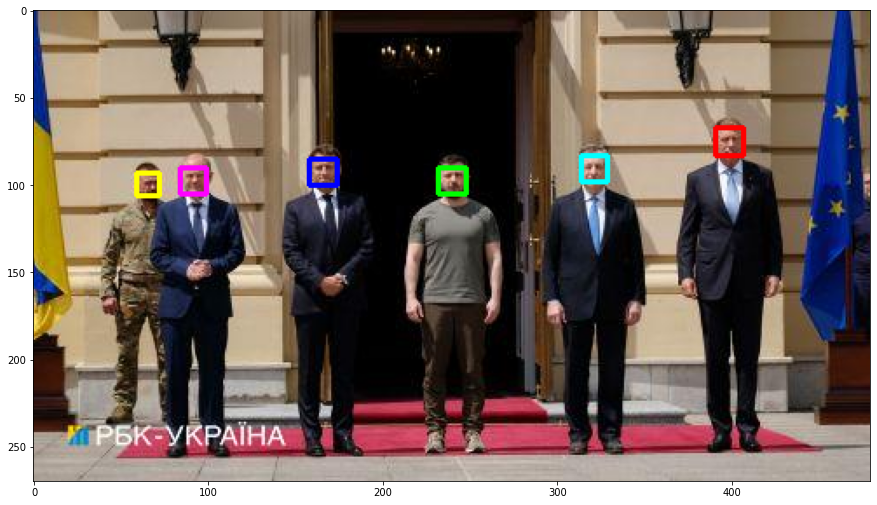

In [6]:
img5 = cv2.imread('./data/z5.jpg')
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
show_faces(img5, 3, 2)

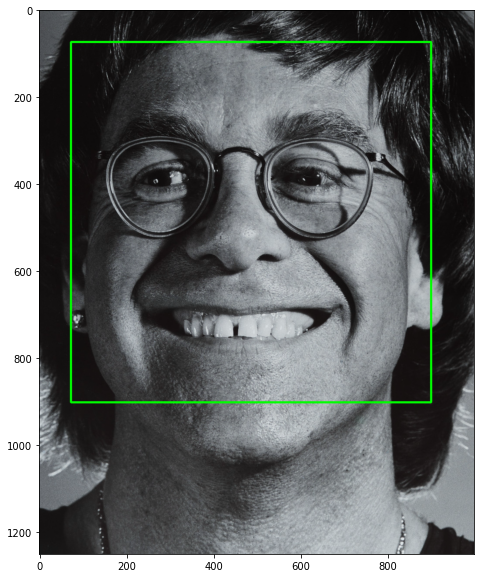

In [7]:
big = cv2.imread('./data/big.jpg')
show_faces(big, 2)

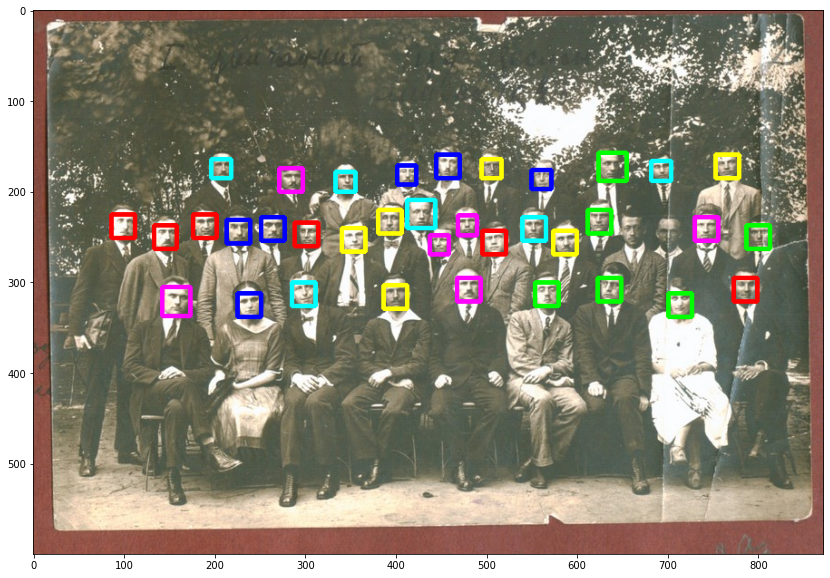

In [8]:
img30 = cv2.imread('./data/30.jpg')
img30 = cv2.cvtColor(img30, cv2.COLOR_BGR2RGB)
show_faces(img30, 2)

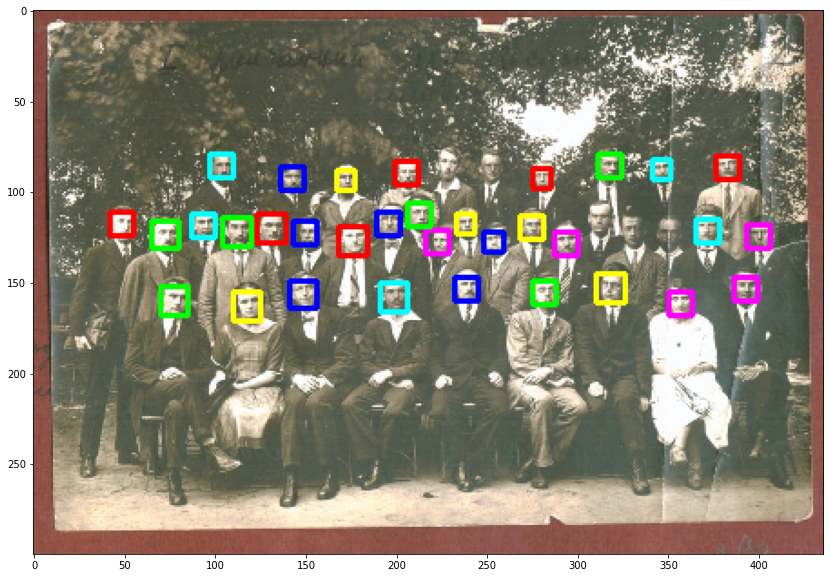

In [9]:
def down_scale(img, scale):
    cols, rows, _ = img.shape
    Z = np.array([[scale, 0, 0], [0, scale, 0]])
    img2 = cv2.warpAffine(img, Z, (cols, rows))
    bottom = np.max(np.argmin(img2, axis=0))
    right = np.max(np.argmin(img2, axis=1))

    return img2[0:bottom, 0:right, :]

img30_2 = down_scale(img30, 0.5)
show_faces(img30_2, 3, 2)

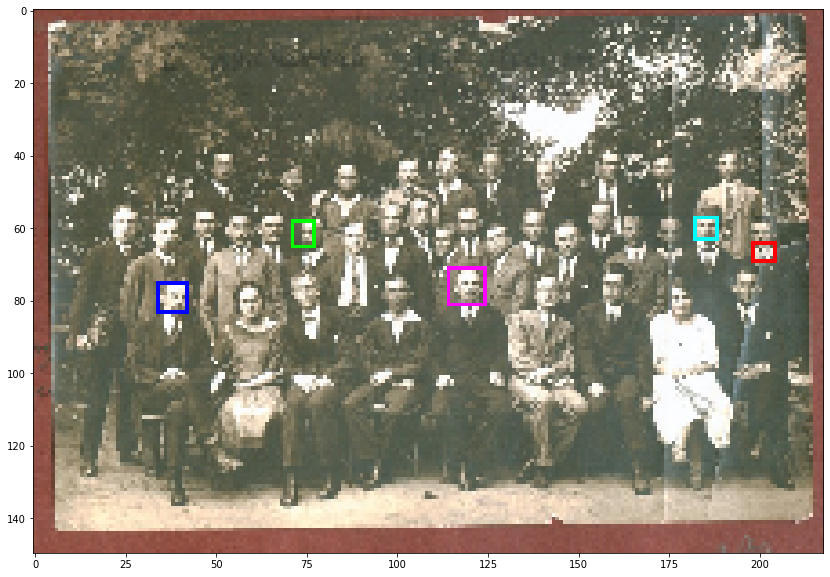

In [10]:
img30_4 = down_scale(img30, 0.25)
show_faces(img30_4, 5, 1)

Looks like this detector works well enough with big enough images, and its robustness decreases with decreased face sizes in pixels. But in general cases, it founds front faces quite well.